In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import nx_arangodb as nxadb
import os

from dotenv import load_dotenv
from arango import ArangoClient
from arango_datasets import Datasets

[15:17:57 +0530] [INFO]: NetworkX-cuGraph is unavailable: No module named 'cupy'.


In [2]:
# Load environment variables from .env file
load_dotenv()

# Initialize the ArangoDB client.
host = os.getenv("HOST")
username = os.getenv("USER")
password = os.getenv("PASSWORD")


In [3]:
# Connect to database
db = ArangoClient(hosts=host).db(username= username, password=password, verify=True)

# Connect to datasets
datasets = Datasets(db)

Output()

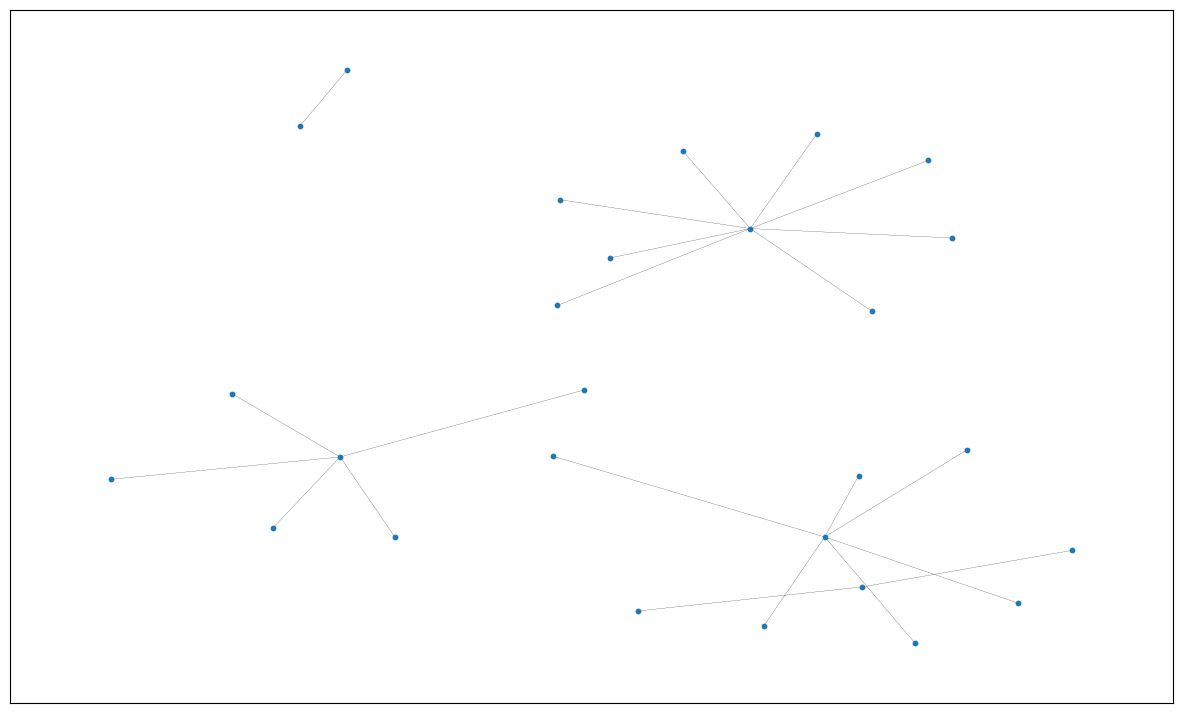

In [4]:
# Extract edge collection from the loaded dataset
edge_collection = "inRegion"  # Change this based on which edge collection you want

# Fetch edges from ArangoDB
edges = db.collection(edge_collection).all()

# Convert edges to a Pandas DataFrame
df = pd.DataFrame(edges)

# Ensure correct column names for NetworkX
df.rename(columns={"_from": "start_node", "_to": "end_node"}, inplace=True)

# Create Graph
G = nx.from_pandas_edgelist(df, "start_node", "end_node")

# Plot Graph
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

plt.show()